## GMM

https://www.youtube.com/watch?v=C7jhwN6H9LU

<AxesSubplot:xlabel='0', ylabel='1'>

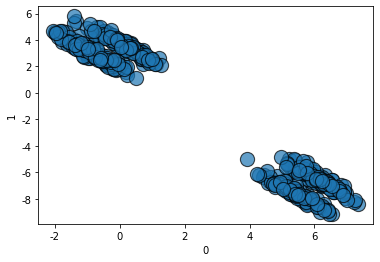

In [316]:
from sklearn.datasets import make_blobs

n_samples = 500   # 샘플 데이터 개수
centers = 4   # 클러스터 개수
cluster_std = 0.75   # 클러스터 내 표준편차
random_state = 13   # 샘플 데이터 고정
 
data, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

# 데이터 타원형으로 만들기
tf = [[0.6, -0.6], [-0.4, 0.8]]
data_tf = data @ tf  # @ : 행렬의 곱을 나타냄
df = pd.DataFrame(data_tf)

# 시각화
sns.scatterplot(x=df[0], y=df[1], alpha = 0.7, edgecolor="k", s=200)


<AxesSubplot:xlabel='0', ylabel='1'>

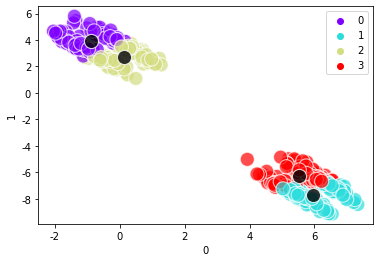

In [317]:
# k-means 학습
model = KMeans(n_clusters=4, random_state=123)
model.fit(df)
df['kmeans_label'] = model.predict(df)
centers = model.cluster_centers_ # 각 클러스터의 Centorid

# 시각화
sns.scatterplot(x=df[0], y=df[1], hue=df['kmeans_label'], palette='rainbow', alpha=0.7, s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=200)


<AxesSubplot:xlabel='0', ylabel='1'>

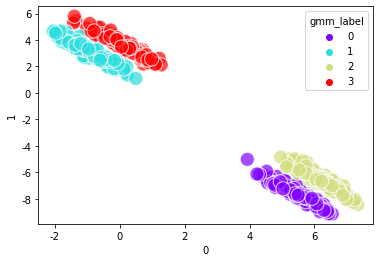

In [294]:
from sklearn.mixture import GaussianMixture

n_components = 4    # 분포 개수
random_state = 10   # 모델 고정

model = GaussianMixture(n_components=n_components, random_state=random_state)

# GMM 모델 학습
model.fit(df)
df['gmm_label'] = model.predict(df)

# 시각화
sns.scatterplot(x=df[0], y=df[1],  hue=df['gmm_label'], palette='rainbow', alpha=0.7, s=200)

<AxesSubplot:xlabel='0', ylabel='1'>

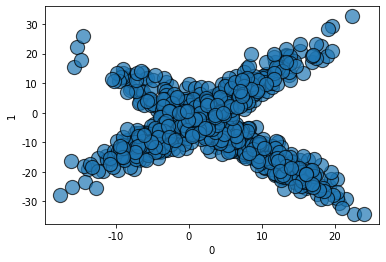

In [323]:
from sklearn.datasets import make_blobs

n_samples = 500   # 샘플 데이터 개수
centers = 1   # 클러스터 개수
cluster_std = 10  # 클러스터 내 표준편차
random_state = 13   # 샘플 데이터 고정
 
data, clusters = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
data1, clusters1 = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

# 데이터 타원형으로 만들기
tf = [[0.6, -0.6], [-0.4, 0.8]]
tf1 = [[0.6, 0.6], [0.4, 0.8]]
# data_tf = data @ tf  # @ : 행렬의 곱을 나타냄
data_tf = data.dot(tf)  # @ : 행렬의 곱을 나타냄
data_tf1 = data1.dot(tf1)  # @ : 행렬의 곱을 나타냄
df = pd.DataFrame(data_tf)
df1 = pd.DataFrame(data_tf1)

ddf = pd.concat([df, df1], axis=0)
# 시각화
sns.scatterplot(x=ddf[0], y=ddf[1], alpha = 0.7, edgecolor="k", s=200)

<AxesSubplot:xlabel='0', ylabel='1'>

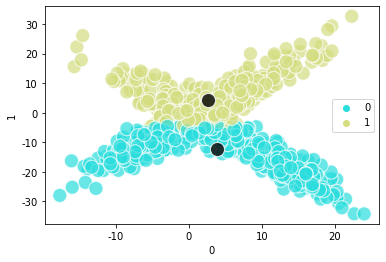

In [320]:
# k-means 학습
model = KMeans(n_clusters=2, random_state=123)
model.fit(ddf)
ddf['kmeans_label'] = model.predict(ddf)
centers = model.cluster_centers_ # 각 클러스터의 Centorid

# 시각화
sns.scatterplot(x=ddf[0], y=ddf[1], hue=ddf['kmeans_label'], palette='rainbow', alpha=0.7, s=200)
sns.scatterplot(x=centers[:,0], y=centers[:,1], color='black', alpha=0.8, s=200)


<AxesSubplot:xlabel='0', ylabel='1'>

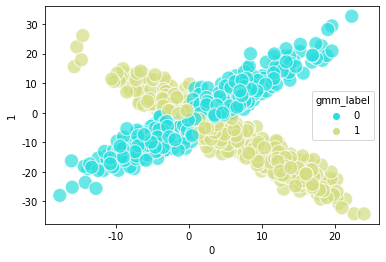

In [324]:
from sklearn.mixture import GaussianMixture

n_components = 2    # 분포 개수
random_state = 10   # 모델 고정

model = GaussianMixture(n_components=n_components, random_state=random_state)

# GMM 모델 학습
model.fit(ddf)
ddf['gmm_label'] = model.predict(ddf)

# 시각화
sns.scatterplot(x=ddf[0], y=ddf[1],  hue=ddf['gmm_label'], palette='rainbow', alpha=0.7, s=200)